# 1.sigmoid函数
sigmoid函数，也就是s型曲线函数，如下：

函数：
$$
f(x)=\frac{1}{1-e^{-x}}
$$
求导：
$$
f'(x)=f(x)(1-f(x))
$$
上面是我们常见的形式，虽然知道这样的形式，也知道计算流程，不够感觉并不太直观，下面来分析一下。
## 1.1 从指数函数到sigmoid
首先我们来画出指数函数的基本图形：
$$
y=e^x 和 y=e^{-x}
$$

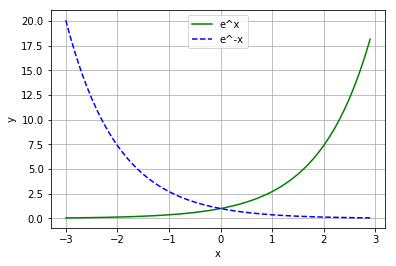

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(-3, 3, 0.1)
fig, ax = plt.subplots()
l1, = ax.plot(X, np.exp(X), 'k', color='g')
l2, = ax.plot(X, np.exp(-X), 'k--',color='b')
ax.legend((l1, l2), ('e^x', 'e^-x'), loc='upper center')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
plt.show()

从上图，我们得到了这样的几个信息，指数函数过(0,1)点，单调递增/递减，定义域为(−∞,+∞)，值域为(0,+∞)，再来我们看一下sigmoid函数的图像：

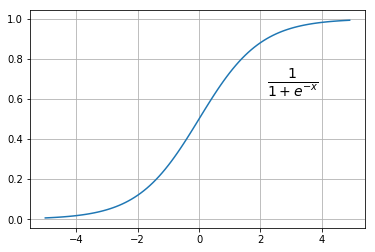

In [3]:
X = np.arange(-5, 5, 0.1)
Y = 1/(1+np.exp(-X))
plt.plot(X, Y)
plt.grid(True)
tex = r'$\frac{1}{1+e^{-x}}$'
plt.text(2.2, 0.6, tex, fontsize=20, va='bottom')
plt.show()

如果直接把e−x放到分母上，就与ex图像一样了，所以分母加上1，就得到了上面的图像，定义域是(−∞,+∞)，值域是(0,1)，那么就有一个很好地特性了，就是不管x是什么，都可以得到(0,1)之间的值；
## 1.2 对数函数与sigmoid
首先来看一下对数函数的图像：

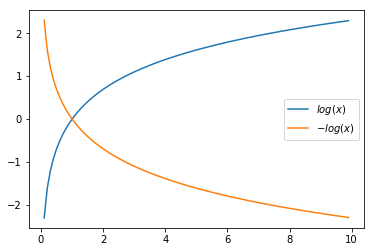

In [66]:
import matplotlib.pyplot as plt
X = np.arange(0.1, 10., 0.1)
l1 = plt.plot(X, np.log(X))
l2 = plt.plot(X, -np.log(X))
plt.legend(('$log(x)$', '$-log(x)$'), loc='right')
plt.show()

​ 对数函数的图像如上，单调递减，有一个比较好的特性就是在(0,1)之间，在接近0的时候，就近无穷大，接近1的时候为0，如果我们把前面的sigmoid函数放到自变量的位置上，就得到了(0,1)的图像；

​ 我们如何来衡量一个结果与实际计算值得差距呢？一种思路就是，如果结果越接近，差值就越小，反之越大，这个函数就提供了这样一种思路，如果计算得到的值越接近1，那么那么表示与世界结果越接近，反之越远，所以利用这个函数，可以作为逻辑回归分类器的损失函数，如果所有的结果都能接近结果值，那么就越接近于0，如果所有的样本计算完成以后，结果接近于0，就表示计算结果与实际结果非常相近。

**（Logistic是Sigmoid的一种代表，Logistic又叫“对数几率函数”，与对数函数$ln(x)$不同）**
# 2、sigmoid函数求导
​ sigmoid导数具体的推导过程如下： 
\begin{align}
f'(x)&=(\frac{1}{1+e^{-x}})'\\
&=\frac{-e^{-x}(-1)}{(1+e^{-x})^2}\\
&=\frac{1+e^{-x}-1}{(1+e^{-x})^2}\\
&=\frac{1}{(1+e^{-x})}(1-\frac{1}{(1+e^{-x})})\\
&=f(x)(1-f(x))\\
\end{align}
可视化一线求导以后的函数：

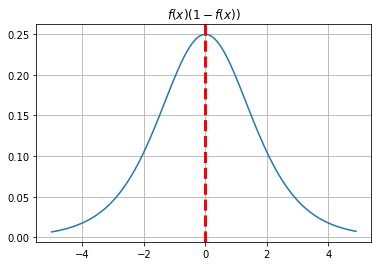

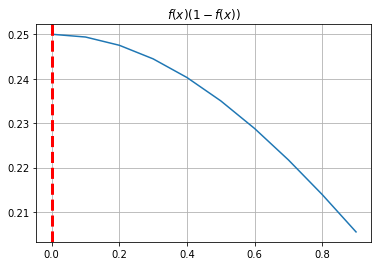

In [4]:
X = np.arange(-5, 5, 0.1)
Y = (1/(1+np.exp(-X)))*(1-1/(1+np.exp(-X)))
plt.plot(X, Y)
plt.axvline(x=0, ymin=0.,ymax=1, linewidth=3, color='r', linestyle='--')
plt.title('$f(x)(1-f(x))$')
plt.grid(True)
plt.show()

X = np.arange(0, 1, 0.1)
Y = (1/(1+np.exp(-X)))*(1-1/(1+np.exp(-X)))
plt.plot(X, Y)
plt.axvline(x=0, ymin=0.,ymax=1, linewidth=3, color='r', linestyle='--')
plt.title('$f(x)(1-f(x))$')
plt.grid(True)
plt.show()

# 3、神经网络逆向传播Backforward propagation
上图反应的就是sigmoid函数的斜率变化，可以看到$(-\infty, 0]$增长越来越快，$[0, +\infty)$下降越来越慢。Sigmoid函数输出结果为$(0, 1)$，所以$f'(x)$的图像如图2所示，导数最大为0.25，即每层的输出误差为减少了75%，经过2层输出减少$(1-0.25*0.25)=93.75$%，如果你的神经网络有很多层，使用 sigmoid 激活函数会很快把靠近输入层的权重步长降为很小的值，该问题称作梯度消失。（一般不用Sigmoid，使用ReLu）

神经网络的损失函数可以理解为是一个多级的复合函数，求导使用链式法则。  

假设一个d X q X l的神经网络
<img src="image/20170718141653072.png" style="height:50%;width:50%;">  


假设隐藏层和输出层的激活函数都是Sigmoid函数
对训练集$(x_k, y_k)$，神经网络出书为$\hat y = (\hat y^k_1, \hat y^k_2, ...,\hat y^k_l)$

$$
\hat y = f(\beta_j - \theta_j)
$$

则在网络$(x_k, y_k)$上的均方误差为（不一定是均方差来计算误差，也可能其他）：

$$
E_k = \frac{1}{2}\Sigma_j(\hat y^k_j - y^k_j)^2
$$

则任意参数v的更新为：

$$
v \leftarrow \hat v + \Delta v
$$

BP算法基于梯度下降(gradient dwscent)策略，以负梯度方向进行调整，给定学习率$\alpha$，即：

$$
\Delta w_{ij} = -\alpha\frac{\partial E_k}{\partial w_{hj}}
$$

根据链式法则求导

$$
\frac{\partial E_k}{\partial w_{hj}} = \frac{\partial E_k}{\partial {\hat y^k_j}}*\frac{\partial \hat y^k_j}{\partial \beta_j}*\frac{\partial \beta_j}{\partial w_{hj}}
$$
根据$\beta_j$的定义，有
$$
\frac{\partial \beta_j}{\partial w_{hj}}=b_h
$$

根据上面Sigmoid的导数性质:
$f'(x)=f(x)(1-f(x))$
\begin{align}
g_j&=\frac{\partial E_k}{\partial \hat y^k_j}*\frac{\partial \hat y^k_j}{\partial \beta_j}\\
&=-(\hat y^k_j-y^k_j)f'(\beta_j-\theta_j)\\
&=\hat y^k_j(1-\hat y^k_j)(y^k_j-\hat y^k_j)
\end{align}

所以：

$$
\Delta w_{hj}=\alpha g_j b_h
$$

一般我们把“预测差值乘以h的激活函数的导数”成为“误差项”(Error Term)，
$h->f(h)->\hat y$记作：

$$
\delta=(y - \hat y)f'(h)
$$

注意上面公式已经计算了负值，对于一般式：($\eta是学习率$)

$$
\Delta w_i = \eta \delta x_i\\
w_i = w_i + \Delta w_i
$$

其他同理：

\begin{align}
\Delta \theta_j &=-\alpha \frac{\partial E_k}{\partial \theta_j}=-\alpha \frac{\partial E_k}{\partial \hat y^k_j}*\frac{\partial \hat y^k_j}{\partial \theta^k_j}\\
&=-\alpha g_i\\
\end{align}

$$
\Delta v_{ih}=\alpha e_h x_i,
\Delta \gamma_h=-\alpha e_h,
$$

其中：

\begin{align}
e_h&=-\frac{\partial E_k}{\partial b_h}*-\frac{\partial b_h}{\partial \alpha_h}\\
&=-\Sigma_j \frac{\partial E_k}{\partial \beta_j}*\frac{\partial \beta_j}{\partial b_h} f'(\alpha_h - \gamma_h)\\
&=\Sigma_j w_{hj} g_j f'(\alpha_h - \gamma_h)\\
&=b_h(1-b_h)\Sigma_j w_{hj}g_j 
\end{align}

学习率$\alpha$可以设定不一样，例如（输入层-隐藏层）的$\alpha$与例如（隐藏层-输出层）的$\alpha$可以不同

### 以下是算法流程
Layer1是input layer

Layer2是hidden layer

Layer3是output layer

Y是实际的预测值
初始化数据：

\begin{align}
input = \left\lgroup \matrix{x_1 \cr x_2 \cr x_3} \right\rgroup\\
weight_1 = \left\lgroup \matrix{w_{11} & w_{12} \cr w_{21} & w_{22}\cr w_{31} & w_{32}} \right\rgroup\\
weight_2 = \left\lgroup \matrix{w_1 \cr w_2 \cr w_3} \right\rgroup\\
learnrate = \eta
\end{align}

Forward propagation的过程：

$$
l_1 = f(input^T * weight_1)\\
l_2 = f(l_1 *  weight_2)
$$

l2就是ouput层的输出，然后我们计算误差：

$$
\hat Y = l_2\\
err = \hat Y - Y\\
$$

然后Backforward propagation的过程：

$$
err_2 = err\\
\Delta l_2 = - learnrate *err * f'(l_2)\\
err_1 = \Delta l_2 * weight_2^T\\
\Delta l_1 = -learnrate*err_1 * f'(l_1)\\
weight_2 += \Delta l_2 * {l_1}^T \\
weight_1 += \Delta l_1 * {input}^T 
$$


### 标准BP和累积BP
标准BP在每次计算一个样本数据都会对参数进行跟新，而累积BP则是在读取训练集一轮（epoch）后，才对参数进行更新。本质区别类似于随机梯度下降（SGD），例如一次epoch中，梯度变化是：+0.4，+0.1，-0.3，-0.3。如果标准BP，前两次都是增加，然后再减少；累积P则是（+0.4，+0.1，-0.3，-0.3）/4 =-0.025减少。很多时候，累积误差下降到一定程度后，进一步下降会很缓慢，这时候BP往往更快获得比较好的解，尤其训练集比较大时候更明显。
#### BK优化
BP神经网络经常会过拟合（over-fitting），有几种策略可以缓解过拟合。
* 第一种是“早停”（early stopping）：降数据分成训练集和验证集，每次训练用验证机来估计误差，若训练集误差降低，验证集误差上升，则停止训练。使用模型复杂图可以更直观查看

<img src='image/model_complexity_graph.png' style="height:70%;width:70%;"></img>


* 第二种是“正则化”（regularization）
主要思想是在误差目标函数中加入一个用于描述网络复杂的部分，例如
L1正则化（权重和阈值的绝对值和）

$$
E=\lambda \frac{1}{m} \sum_k^mE_k + (1 - \lambda)\sum_i |w_i|
$$

L2正则化（权重和阈值的平方和），目标函数为:

$$
E=\lambda \frac{1}{m} \sum_k^mE_k + (1 - \lambda)\sum_i w_i^2
$$

m表示样本数量，k表示第k个样本，$w_i$表示权重和阈值,$\lambda$ 是惩罚系数


|     L1     | L2 |
|  :----: | :----: |
| 适合稀疏向量的参数，权重类似<br>(1, 0, 0, 1) |  不支持稀疏，一般训练模型比较好的结果 |
| 适合特定选择    |  L2求误差更小(权重在0~1) |

[L1, L2正则化原理和性质](http://blog.csdn.net/zouxy09/article/details/24971995)


#### Dropout 
随机关闭某些及节点，即改节点的权重不更新，梯度变化偏向于其他节点。这是比较常用又简单的方法
理解为dropout mask，把某些节点关掉，使其他节点承担更多fp,bp工作
> h1 = Rule(np.dot(w1, x) + b1) / p
> h2 = Rule(np.dot(w2, h1) + b2) /  p
> out = np.dot(w3, h2) + b3

p是keep probability，在traning time做缩放，测试时候就无需再特殊处理，这样才使test预测和train时效果一致


### Batch Normalization
$$
\hat x^{(k)} = \frac {x^{k} - E[x^{(k)}]}{\sqrt {var[x^{(k)}]}}
$$
公式简单粗糙，对某一个层网络的输入数据做一个归一化处理。需要注意的是，我们训练过程中采用batch 随机梯度下降，上面的$E(x^{(k)})$指的是每一批训练数据神经元$x^{(k)}$的平均值；然后分母就是每一批数据神经元$x^{(k)}$的一个标准差了。
具体在网络层表达一下：
$$
\mu = \frac {1}{m}\sum z^{(i)}\\
\sigma^2 = \frac {1}{m} \sum(z^{(i)} - \mu )
z^{(i)}_{norm} = \frac {z^{i} - \mu}{\sqrt {\sigma^2 + \varepsilon}}
$$
$\varepsilon$是为了防止分母为0
$$
\tilde{z}^{(i)} = \gamma z^{(i)}_{norm} + \beta
$$
test 的时候使用更训练得到的超参$\gamma$和$\beta$

对于深度网络的训练是一个复杂的过程，只要网络的前面几层发生微小的改变，那么后面几层就会被累积放大下去。一旦网络某一层的输入数据的分布发生改变，那么这一层网络就需要去适应学习这个新的数据分布，所以如果训练过程中，训练数据的分布一直在发生变化，那么将会影响网络的训练速度。

trains时候，参数就要发生更新，除了输入层的数据外(因为输入层数据，我们已经人为的为每个样本归一化)，后面网络每一层的输入数据分布是一直在发生变化的，因为在训练的时候，前面层训练参数的更新将导致后面层输入数据分布的变化。以网络第二层为例：网络的第二层输入，是由第一层的参数和input计算得到的，而第一层的参数在整个训练过程中一直在变化，因此必然会引起后面每一层输入数据分布的改变。我们把网络中间层在训练过程中，数据分布的改变称之为：“Internal  Covariate Shift”。

BN有点归一化和正则化的效果，有时候我们不想hidden缩放太接近zero-center，所以使用$\gamma$和$\beta$控制。使用BN可以减少过拟合中drop out、L2正则项参数的选择问题，采用BN算法后，你可以移除这两项了参数，或者可以选择更小的L2正则约束参数了，因为BN具有提高网络泛化能力的特性，即使learnning rate变大也可以很快得到收敛，所以效率比较高

